# analysis_d23b
Use functions in [**`d23b.py`**](d23b.py) to perform analysis and produce figures for _Unknown Dependence Between Ice Sheets Contributes Ambiguity to Sea-level Projections_.

Author: Benjamin S. Grandey, 2023

In [1]:
! date

Fri May 12 12:20:22 +08 2023


In [2]:
import d23b
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.13.1

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.1
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.4.2

conda environment: d23b-ice-dependence



## Relationship between sources of uncertainty and model-based projections of the ice-sheet components
The schematic is produced separately using [**schematic_fig_d23b.pptx**](schematic_fig_d23b.pptx): first, export from PowerPoint to `fig01.pdf` (in `figs_d23b/f_pdf/`), then export `fig01.pdf` to `fig01.png` (in `figs_d23b/f_png/`).

In [4]:
# Are the .pdf and .png versions of the schematic more recent than the .pptx version?
schematic_pptx = Path('schematic_fig_d23b.pptx')
fig_name = f'fig{next(d23b.f_num):02}'  # name based on counter, then update counter (in prep for next fig)
schematic_pdf = Path(f'figs_d23b/f_pdf/{fig_name}.pdf')
schematic_png = Path(f'figs_d23b/f_png/{fig_name}.png')
for f in (schematic_pptx, schematic_pdf, schematic_png):
    try:
        print(f'{time.ctime(f.stat().st_mtime)}: {f.name}')
    except FileNotFoundError:
        print(f'Not found: {f.name}')

Wed May  3 11:15:29 2023: schematic_fig_d23b.pptx
Fri May 12 11:57:01 2023: fig01.pdf
Fri May 12 11:58:17 2023: fig01.png


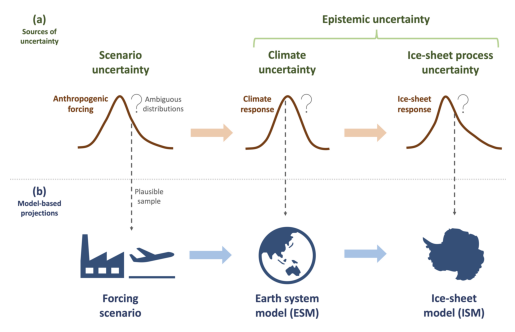

In [5]:
# Show schematic
plt.imshow(plt.imread(schematic_png))
plt.axis('off')
plt.show()

In [6]:
! date

Fri May 12 12:20:23 +08 2023
